In [1]:
from scipy import *
import numpy as np
import WLanalysis
from matplotlib import pyplot

In [2]:
## generate average stats, on stampede2
# ALL_fn = genfromtxt('ALL_fn.txt',dtype='string')
# fn_list = genfromtxt('cosmo_params_all.txt',usecols=1, dtype='string')
# fnjia_list = genfromtxt('cosmo_params_all.txt',usecols=0, dtype='string')
# stats_fn = lambda iALL, ieb, icosmo: '/scratch/02977/jialiu/peakaboo/stats/'+icosmo+'/1024b512/'+ieb+'/'+iALL
# stats_dir = '/scratch/02977/jialiu/peakaboo/stats_avg/'
# for ieb in ['output_eb_5000_s4','output_tt_3000_s4']:        
#     for iALL in ALL_fn:
#         out_fn = stats_dir+'%s_%s'%(ieb, iALL)
#         print out_fn
#         out = array([mean(load(stats_fn(iALL, ieb, icosmo)),axis=0) for icosmo in fn_list])
#         save(out_fn, out)

In [3]:
z_source = arange(0.5,3,0.5)
isum = 210**2
pdf2debI = array([load('stats_avg/output_eb_5000_s4_ALL_igalXicmb_2dpdf_%.1f_1.0_1.0.npy'
                     %(iz)) for iz in z_source])
pdf2dttI = array([load('stats_avg/output_tt_3000_s4_ALL_igalXicmb_2dpdf_%.1f_1.0_1.0.npy'
                     %(iz)) for iz in z_source])
pdf2debN = array([load('stats_avg/output_eb_5000_s4_ALL_galXcmb_2dpdf_%.1f_1.0_1.0.npy'
                     %(iz)) for iz in z_source])
pdf2dttN = array([load('stats_avg/output_tt_3000_s4_ALL_galXcmb_2dpdf_%.1f_1.0_1.0.npy'
                     %(iz)) for iz in z_source])

In [4]:
params = genfromtxt('cosmo_params_all.txt',usecols=[2,3,4,5]) 

In [5]:
X, Y = meshgrid(linspace(-3,5,80), linspace(-3,3,60))
print X.shape, Y.shape, pdf2debI.shape

(60, 80) (60, 80) (5, 101, 60, 80)


In [7]:
#WLanalysis.findlevel(ipdf0, isum = isum)
# sum(ipdf0)
# iH = ipdf0
# H = iH/isum
# print sum(H)
# idx = np.argsort(H.flat)[::-1]
# H_sorted = H.flat[idx]
# H_cumsum = np.cumsum(H_sorted)
# idx68 = where(abs(H_cumsum-0.683)==amin(abs(H_cumsum-0.683)))[0]    
# idx95 = where(abs(H_cumsum-0.955)==amin(abs(H_cumsum-0.955)))[0]
# idx99 = where(abs(H_cumsum-0.997)==amin(abs(H_cumsum-0.997)))[0]
# print idx68[0], idx95, idx99

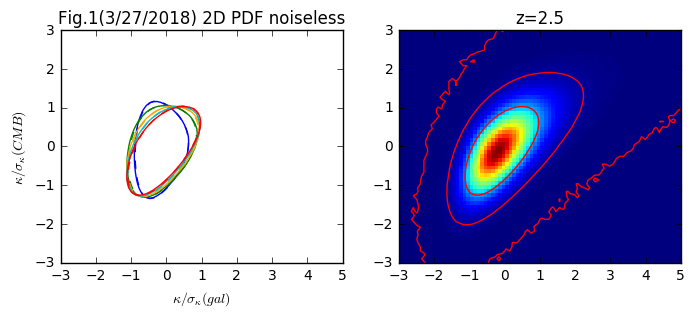

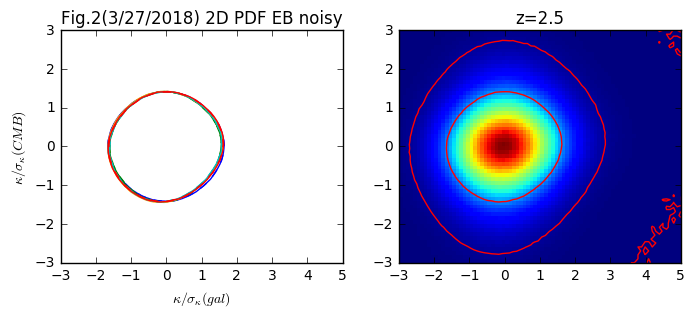

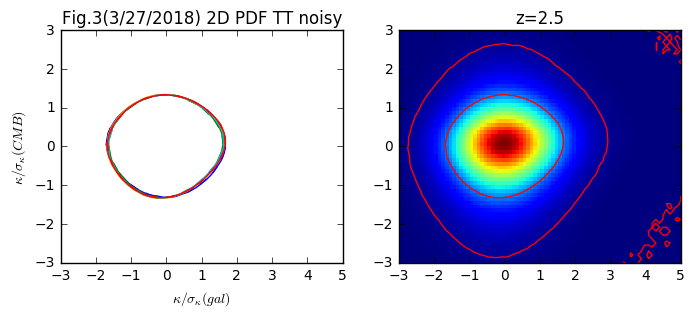

In [57]:
i = 0
titles = ['noiseless',  'EB noisy', 'TT noisy']
for pdf2ds in [pdf2debI, pdf2debN, pdf2dttN]:
    i+=1
    f, (ax1,ax2) = subplots(1,2,figsize=(8,3))
    seed(45)
    colors=['b','g','orange','c','r']
    for iz in range(5):
        icolor=rand(3)
        ipdf0 = pdf2ds[iz, 0]
        ilev0=WLanalysis.findlevel(ipdf0, isum = isum)
        ipdf1 = pdf2ds[iz, 1]
        ilev1=WLanalysis.findlevel(ipdf1, isum = isum)
        ax1.contour(X, Y, ipdf0, levels=[ilev0[0],], colors=colors[iz],label='z=%.1f'%(z_source[iz]))
        ax1.contour(X, Y, ipdf1, levels=[ilev1[0],], colors=colors[iz], linestyles='dashed')
        if iz==4:
            ax2.imshow(ipdf0,extent=[-3,5,-3,3], origin='lower',aspect='auto',interpolation='nearest')
            ax2.contour(X, Y,ipdf0, levels=sort(ilev0), colors='r',label='z=%.1f'%(z_source[iz]))
    ax1.legend(loc=0,frameon=0, fontsize=10)
    #ax1.set_xlim(-2,2)
    #ax1.set_ylim(-2,2)
    ax1.set_xlabel(r'$\kappa/\sigma_\kappa (gal)$')
    ax1.set_ylabel(r'$\kappa/\sigma_\kappa (CMB)$')
    ax1.set_title('Fig.%i(3/27/2018) 2D PDF %s'%(i, titles[i-1]))
    ax2.set_title('z=2.5')
    show()   


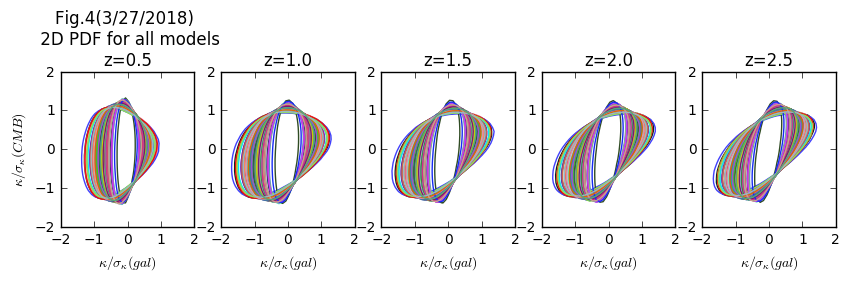

In [9]:
f, axes = subplots(1,5,figsize=(10,2))
for iz in range(5):
    seed(45)
    for ipdf2ds in pdf2debI[iz]:
        icolor=[rand(3),]
        ilev=WLanalysis.findlevel(ipdf2ds, isum = isum)
        axes[iz].contour(X, Y, ipdf2ds, levels=[ilev[0],],colors=icolor)
    axes[iz].set_title('z=%.1f'%(z_source[iz]))
    axes[iz].set_xlim(-2,2)
    axes[iz].set_ylim(-2,2)
    axes[iz].locator_params(tight=True, nbins=4)
    axes[iz].set_xlabel(r'$\kappa/\sigma_\kappa (gal)$')

ax1=axes[0]
ax1.legend(loc=0,frameon=0, fontsize=10)
ax1.set_ylabel(r'$\kappa/\sigma_\kappa (CMB)$')
ax1.set_title('Fig.4(3/27/2018) \n 2D PDF for all models\nz=0.5')
show()

In [10]:
pdf2debI.shape

(5, 101, 60, 80)

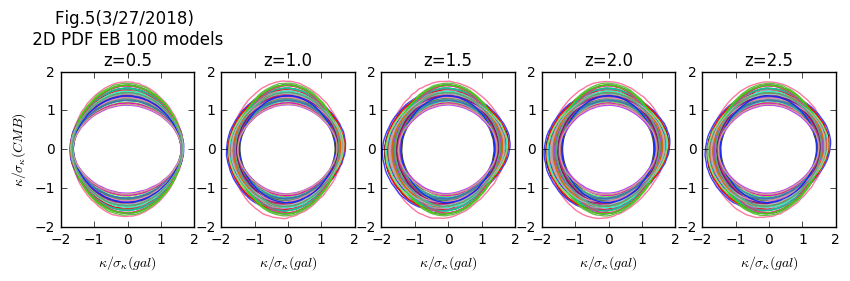

In [11]:
f, axes = subplots(1,5,figsize=(10,2))
for iz in range(5):
    seed(45)
    for ipdf2ds in pdf2debN[iz]:
        icolor=[rand(3),]
        ilev=WLanalysis.findlevel(ipdf2ds, isum = isum)
        axes[iz].contour(X, Y, ipdf2ds, levels=[ilev[0],],colors=icolor)
    axes[iz].set_title('z=%.1f'%(z_source[iz]))
    axes[iz].set_xlim(-2,2)
    axes[iz].set_ylim(-2,2)
    axes[iz].locator_params(tight=True, nbins=4)
    axes[iz].set_xlabel(r'$\kappa/\sigma_\kappa (gal)$')

ax1=axes[0]
ax1.legend(loc=0,frameon=0, fontsize=10)
ax1.set_ylabel(r'$\kappa/\sigma_\kappa (CMB)$')
ax1.set_title('Fig.5(3/27/2018) \n 2D PDF EB 100 models \nz=0.5')
show()

In [12]:
PDF2dInterp = [WLanalysis.buildInterpolator(pdf2debI[i].reshape(len(params),-1), params[:,:-1]) for i in range(5)]

In [13]:
PDF2dInterp[0]([0.09, 0.3, 2.1])

array([ 0.        ,  0.        ,  0.        , ...,  0.00954016,
        0.01092807,  0.01051702])

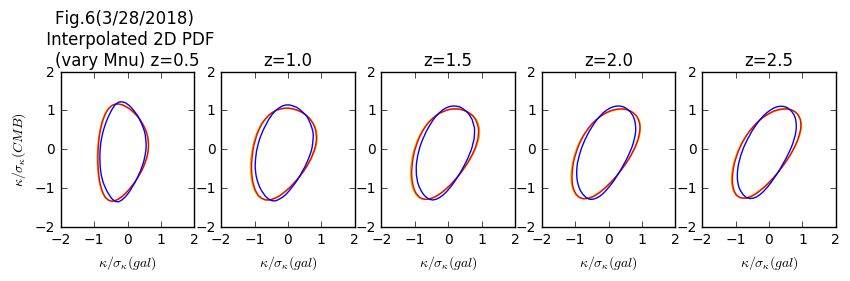

In [14]:
f, axes = subplots(1,5,figsize=(10,2))
for iz in range(5):    
    i=0
    for imnu in (0.0, 0.1, 0.6): 
        ipdf2ds = PDF2dInterp[iz]([imnu, 0.3, 2.1]).reshape(60, 80)
        ilev=WLanalysis.findlevel(ipdf2ds, isum = isum)
        axes[iz].contour(X, Y, ipdf2ds, levels=[ilev[0],],colors=['y','r','b'][i])
        i+=1
    axes[iz].set_title('z=%.1f'%(z_source[iz]))
    axes[iz].set_xlim(-2,2)
    axes[iz].set_ylim(-2,2)
    axes[iz].locator_params(tight=True, nbins=4)
    axes[iz].set_xlabel(r'$\kappa/\sigma_\kappa (gal)$')

ax1=axes[0]
ax1.legend(loc=0,frameon=0, fontsize=10)
ax1.set_ylabel(r'$\kappa/\sigma_\kappa (CMB)$')
ax1.set_title('Fig.6(3/28/2018) \n Interpolated 2D PDF\n(vary Mnu) z=0.5')
show()

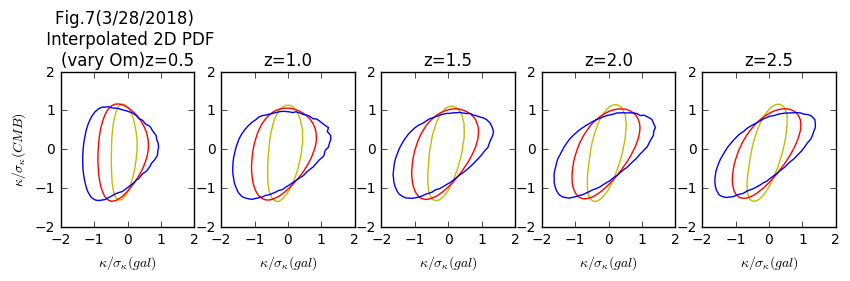

In [15]:
f, axes = subplots(1,5,figsize=(10,2))
for iz in range(5):    
    i=0
    for iom in (0.2, 0.3, 0.4): 
        ipdf2ds = PDF2dInterp[iz]([0.1, iom, 2.1]).reshape(60, 80)
        ilev=WLanalysis.findlevel(ipdf2ds, isum = isum)
        axes[iz].contour(X, Y, ipdf2ds, levels=[ilev[0],],colors=['y','r','b'][i])
        i+=1
    axes[iz].set_title('z=%.1f'%(z_source[iz]))
    axes[iz].set_xlim(-2,2)
    axes[iz].set_ylim(-2,2)
    axes[iz].locator_params(tight=True, nbins=4)
    axes[iz].set_xlabel(r'$\kappa/\sigma_\kappa (gal)$')

ax1=axes[0]
ax1.legend(loc=0,frameon=0, fontsize=10)
ax1.set_ylabel(r'$\kappa/\sigma_\kappa (CMB)$')
ax1.set_title('Fig.7(3/28/2018) \n Interpolated 2D PDF\n(vary Om)z=0.5')
show()

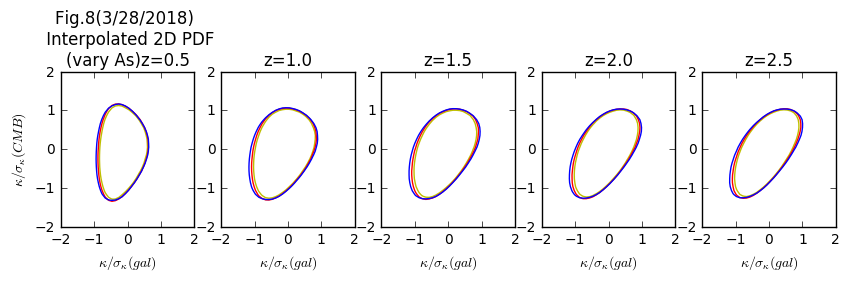

In [16]:
f, axes = subplots(1,5,figsize=(10,2))
for iz in range(5):    
    i=0
    for iAs in (1.9,2.1,2.3): 
        ipdf2ds = PDF2dInterp[iz]([0.1, 0.3, iAs]).reshape(60, 80)
        ilev=WLanalysis.findlevel(ipdf2ds, isum = isum)
        axes[iz].contour(X, Y, ipdf2ds, levels=[ilev[0],],colors=['y','r','b'][i])
        i+=1
    axes[iz].set_title('z=%.1f'%(z_source[iz]))
    axes[iz].set_xlim(-2,2)
    axes[iz].set_ylim(-2,2)
    axes[iz].locator_params(tight=True, nbins=4)
    axes[iz].set_xlabel(r'$\kappa/\sigma_\kappa (gal)$')

ax1=axes[0]
ax1.legend(loc=0,frameon=0, fontsize=10)
ax1.set_ylabel(r'$\kappa/\sigma_\kappa (CMB)$')
ax1.set_title('Fig.8(3/28/2018) \n Interpolated 2D PDF\n(vary As)z=0.5')
show()

In [17]:
######## now try to do a fisher forecast for 2d PDF, but first, we need to reduce the dimensions to ~1000
######## so each redshift should be Nd<=200, or ~15 bins per dimension (currently 60 x 80)
Nc = 2 ## compression ratio
reshaper = lambda imat: sum(imat[:,:,:60].reshape(101, 60/Nc, Nc, 60/Nc, Nc), axis=(2,4))
reshaped_pdf_test60 = pdf2debI[4][0][:,:60].copy()
reshaped_pdf_test15 = reshaper(pdf2debI[4])[0]

reshaped_pdf_test60[reshaped_pdf_test60<=0]=nan
reshaped_pdf_test15[reshaped_pdf_test15<=0]=nan
#print pdf2debI.shape, pdf2debI[0][:,:,:60].shape
#print sum(~isnan(reshaped_pdf_test15))

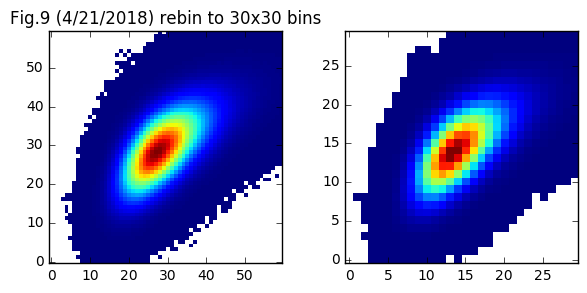

In [60]:
f, (ax1, ax2) = subplots(1,2,figsize=(7,3))
ax1.imshow(reshaped_pdf_test60,interpolation='nearest',origin='lower')
ax2.imshow(reshaped_pdf_test15,interpolation='nearest',origin='lower')
ax1.set_title('Fig.9 (4/21/2018) rebin to 30x30 bins')
show()

In [19]:
pdf2dI_cov = array([load('box5/output_eb_5000_s4/ALL_igalXicmb_2dpdf_%.1f_1.0_1.0.npy'
                     %(iz)) for iz in z_source])
pdf2dN_cov = array([load('box5/output_eb_5000_s4/ALL_galXcmb_2dpdf_%.1f_1.0_1.0.npy'
                     %(iz)) for iz in z_source])
print pdf2dI_cov.shape
pdf2dI_cov = sum(pdf2dI_cov[:,:,:,:60].reshape(5, 10000, 60/Nc, Nc, 60/Nc, Nc), axis=(3,5))
pdf2dN_cov = sum(pdf2dN_cov[:,:,:,:60].reshape(5, 10000, 60/Nc, Nc, 60/Nc, Nc), axis=(3,5))

In [20]:
print pdf2dI_cov.shape

(5, 10000, 30, 30)


In [21]:
########## flatten the 2D pdf to 1D to prepare for covariance

########## noiseless
pdf2dI_cov_flat = swapaxes(pdf2dI_cov, 0,1).reshape(10000,-1)
idxI_NZ = where( amin(pdf2dI_cov_flat,axis=0)>0)[0]
covInput = cov(pdf2dI_cov_flat[:, idxI_NZ], rowvar = 0)
print idxI_NZ.shape, pdf2dI_cov_flat[:, idxI_NZ].shape, covInput.shape
covII = mat(covInput).I

########## noisy
pdf2dN_cov_flat = swapaxes(pdf2dN_cov, 0,1).reshape(10000,-1)
idxN_NZ = where( amin(pdf2dN_cov_flat,axis=0)>0)[0]
covN = cov(pdf2dN_cov_flat[:, idxN_NZ], rowvar = 0)
covIN = mat(covN).I
print idxN_NZ.shape, pdf2dN_cov_flat[:, idxN_NZ].shape, covIN.shape

(1262,) (10000, 1262) (1262, 1262)
(2538,) (10000, 2538) (2538, 2538)


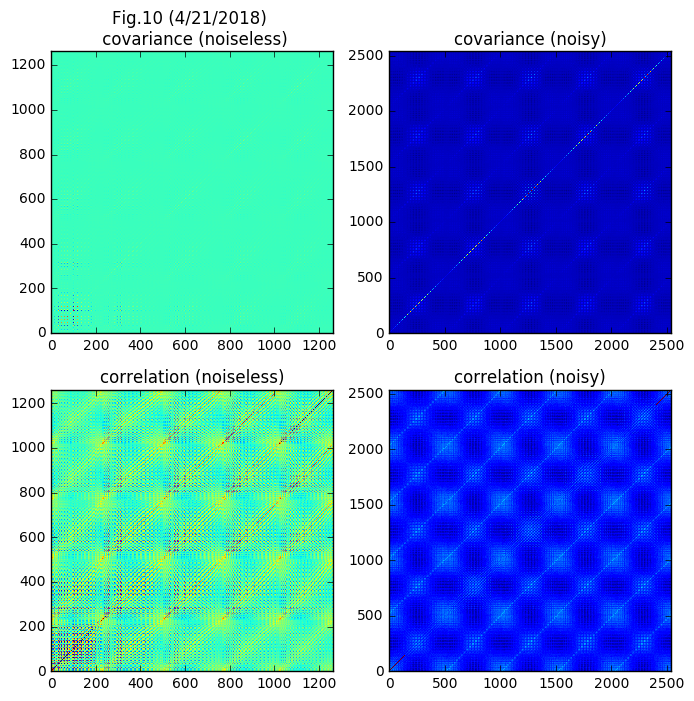

In [63]:
f, ((ax1, ax2),(ax1b, ax2b)) = subplots(2,2,figsize=(8,8))
ax1.imshow(covInput,interpolation='nearest',origin='lower')
ax2.imshow(covN,interpolation='nearest',origin='lower')
ax1b.imshow(WLanalysis.corr_mat(covInput),interpolation='nearest',origin='lower')
ax2b.imshow(WLanalysis.corr_mat(covN),interpolation='nearest',origin='lower')

ax1.set_title('Fig.10 (4/21/2018) \n covariance (noiseless)')
ax2.set_title('covariance (noisy)')
ax1b.set_title('correlation (noiseless)')
ax2b.set_title('correlation (noisy)')
#savefig('corr_mat.pdf')
show()

In [64]:
stats_I = swapaxes(sum(pdf2debI[:,:,:,:60].reshape(5, 101, 60/Nc, Nc, 60/Nc, Nc), axis=(3,5)), 0, 1)
stats_N = swapaxes(sum(pdf2debN[:,:,:,:60].reshape(5, 101, 60/Nc, Nc, 60/Nc, Nc), axis=(3,5)), 0, 1)

PDF2dInterpI = WLanalysis.buildInterpolator(stats_I.reshape(len(params),-1)[:, idxI_NZ], params[:,:-1])
PDF2dInterpN = WLanalysis.buildInterpolator(stats_N.reshape(len(params),-1)[:, idxN_NZ], params[:,:-1])

In [31]:
def Fisher(covI, der):
    '''
    Input: covariance inverse matrix (Nbin, Nbin)
    derivatives (Nparams, Nbin), where Nparams is the number of parameters 
    Return the Fisher matrix'''
    Nparams, Nbin = der.shape
    #print Nparams, Nbin
    F = zeros( shape= (Nparams, Nparams))
    for i in range(Nparams):
        for j in range(Nparams):
            dA, dB = der[i], der[j]
            Mij = mat(dA).T*mat(dB) + mat(dB).T*mat(dA)  
            F [i,j]= 0.5*trace(covI*Mij)
    Ferr = real(sqrt(mat(F).I)) [range(Nparams), range(Nparams)]
    return F, Ferr

In [68]:
ir = 0.05
fidu_params = (0.1, 0.3, 2.1)
params_der = array( [[[0.1*(1.0-ir/2), 0.3, 2.1],[0.1*(1.0+ir/2), 0.3, 2.1]] ,
                    [[0.1, 0.3*(1.0-ir/2), 2.1],[0.1, 0.3*(1.0+ir/2), 2.1]] ,
                    [[0.1, 0.3, 2.1*(1.0-ir/2)],[0.1, 0.3, 2.1*(1.0+ir/2)]]] )
#print params_der.shape
derI = array([(PDF2dInterpI(params_der[i][0]) + PDF2dInterpI(params_der[i][1]))/(fidu_params[i]*ir) 
        for i in range(3)])
derN = array([(PDF2dInterpN(params_der[i][0]) + PDF2dInterpN(params_der[i][1]))/(fidu_params[i]*ir) 
        for i in range(3)])

print 'parameters used for derivatives'
for i in range(3):
    print params_der[i][0], params_der[i][1]

parameters used for derivatives
[ 0.0975  0.3     2.1   ] [ 0.1025  0.3     2.1   ]
[ 0.1     0.2925  2.1   ] [ 0.1     0.3075  2.1   ]
[ 0.1     0.3     2.0475] [ 0.1     0.3     2.1525]


In [76]:
pdf2dI_cov_flat[:, idxI_NZ].shape

(10000, 1262)

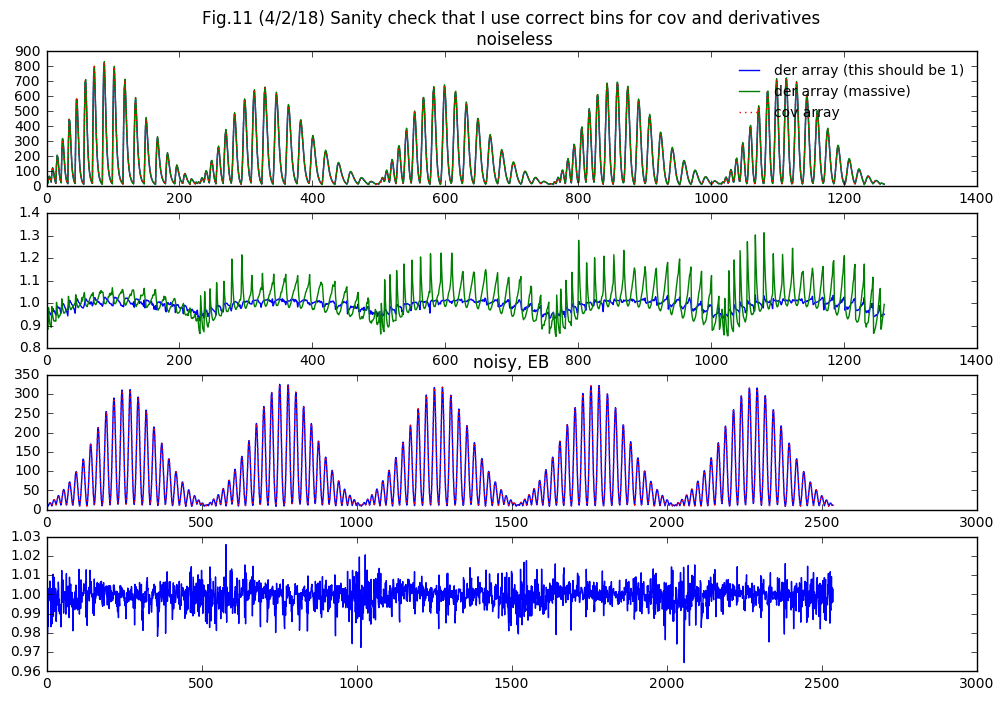

In [94]:
f, (ax1, ax2, ax3, ax4)=subplots(4,1, figsize=(12,8))
ax1.plot(stats_I.reshape(len(params),-1)[:, idxI_NZ] [0], 'b-',label='der array (this should be 1)')
ax1.plot(stats_I.reshape(len(params),-1)[:, idxI_NZ] [1], 'g-',label='der array (massive)')
ax1.plot( mean(pdf2dI_cov_flat[:, idxI_NZ],axis=0), 'r:',label='cov array')
ax2.plot( mean(pdf2dI_cov_flat[:, idxI_NZ],axis=0) / stats_I.reshape(len(params),-1)[:, idxI_NZ] [0], 'b-')
ax2.plot( mean(pdf2dI_cov_flat[:, idxI_NZ],axis=0) / stats_I.reshape(len(params),-1)[:, idxI_NZ] [1], 'g-')

ax1.legend(frameon=0, fontsize=10,loc=0)
ax1.set_title('Fig.11 (4/2/18) Sanity check that I use correct bins for cov and derivatives\n noiseless')
ax3.plot(stats_N.reshape(len(params),-1)[:, idxN_NZ] [0], 'b-',label='der array')
ax3.plot(mean(pdf2dN_cov_flat[:, idxN_NZ],axis=0), 'r:',label='cov array')
ax4.plot(mean(pdf2dN_cov_flat[:, idxN_NZ],axis=0)/stats_N.reshape(len(params),-1)[:, idxN_NZ] [0])
ax3.set_title('noisy, EB')
show()

In [33]:
FisherI = Fisher(covII, derI)
FisherN = Fisher(covIN, derN)

In [34]:
print covII.shape, covIN.shape, derI.shape, derN.shape, FisherI[0].shape, FisherN[0].shape

(1262, 1262) (2538, 2538) (3, 1262) (3, 2538) (3, 3) (3, 3)


In [37]:
print '2D PDF:'
print 'Fisher error (noiseless) on [Mnu, omega_m, A_s]:',FisherI[1]*sqrt(12.25/2e4)
print 'Fisher error (EB recon)  on [Mnu, omega_m, A_s]:',FisherN[1]*sqrt(12.25/2e4)

Fisher error (noiseless) on [Mnu, omega_m, A_s]: [ 0.00028652  0.00085273  0.00097612]
Fisher error (EB recon)  on [Mnu, omega_m, A_s]: [ 0.00090727  0.00273976  0.00088133]


In [54]:
for i in range(5):
    print sum(mean(pdf2dI_cov[i], axis=0)),sum(mean(pdf2dN_cov[i], axis=0))

43300.468 43253.1823
43344.8533 43217.9155
43467.1383 43160.4328
43527.7872 43208.0429
43562.6835 43224.8796


In [59]:
print pdf2debI.shape
for i in range(5):
    print sum(pdf2debI[i,0,:,:60]), sum(pdf2debN[i,0,:,:60]), sum(pdf2debI[i,0,:,:60]), sum(pdf2debN[i,0,:,:60])

(5, 101, 60, 80)
43282.803 43248.953 43282.803 43248.953
43336.975 43213.1 43336.975 43213.1
43463.267 43155.641 43463.267 43155.641
43525.382 43205.84 43525.382 43205.84
43560.439 43221.416 43560.439 43221.416


In [58]:
print params[0], pdf2dI_cov.shape, pdf2debI.shape

[ 0.      0.3     2.1     0.8523] (5, 10000, 30, 30) (5, 101, 60, 80)


In [79]:
pdf2dcovI = array([load('box5/output_eb_5000_s4/ALL_igalXicmb_2dpdf_%.1f_1.0_1.0.npy'
                     %(iz)) for iz in z_source])

In [80]:
print pdf2debI.shape, pdf2dcovI.shape

(5, 101, 60, 80) (5, 10000, 60, 80)


In [82]:
x1 = mean(pdf2dcovI,axis=1)
x2 = pdf2debI[:,0,:,:]
print x1.shape, x2.shape

(5, 60, 80) (5, 60, 80)


/Users/jia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()
/Users/jia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


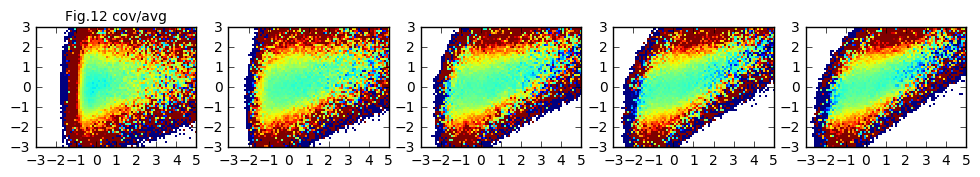

In [97]:
f, axes = subplots(1,5,figsize=(12,3))
for i in range(5):  
    axes[i].imshow(x2[i]/x1[i],vmin=0.9,vmax=1.1, origin='lower',interpolation='nearest',extent=[-3,5,-3,3])
axes[0].set_title('Fig.12 cov/avg',fontsize=10)
show()    

In [112]:
print stats_I.shape, pdf2dI_cov.shape

(101, 5, 30, 30) (5, 10000, 30, 30)


In [113]:
######### now test constraints from 1D pdf

pdf1dI=sum(stats_I,axis=-2).reshape(101,-1)
pdf1dN=sum(stats_N,axis=-2).reshape(101,-1)
pdf1dIcov=sum(swapaxes(pdf2dI_cov,0,1),axis=-2).reshape(10000,-1)
pdf1dNcov=sum(swapaxes(pdf2dN_cov,0,1),axis=-2).reshape(10000,-1)

In [114]:
print pdf1dI.shape, pdf1dIcov.shape

(101, 150) (10000, 150)


In [116]:
idx1dI = where(amin(pdf1dIcov,axis=0)>0)[0]
idx1dN = where(amin(pdf1dNcov,axis=0)>0)[0]
print idx1dI.shape, idx1dN.shape

(111,) (150,)


In [120]:
PDF1dInterpI = WLanalysis.buildInterpolator(pdf1dI[:,idx1dI], params[:,:-1])
PDF1dInterpN = WLanalysis.buildInterpolator(pdf1dN[:,idx1dN], params[:,:-1])

der1dI = array([(PDF1dInterpI(params_der[i][0]) + PDF1dInterpI(params_der[i][1]))/(fidu_params[i]*ir) 
        for i in range(3)])
der1dN = array([(PDF1dInterpN(params_der[i][0]) + PDF1dInterpN(params_der[i][1]))/(fidu_params[i]*ir) 
        for i in range(3)])


In [122]:
print der1dI.shape, der1dN.shape

(3, 111) (3, 150)


In [123]:
cov1dI = cov(pdf1dIcov[:,idx1dI],rowvar=0)
cov1dN = cov(pdf1dNcov[:,idx1dN],rowvar=0)
cov1dII = mat(cov1dI).I
cov1dIN = mat(cov1dN).I


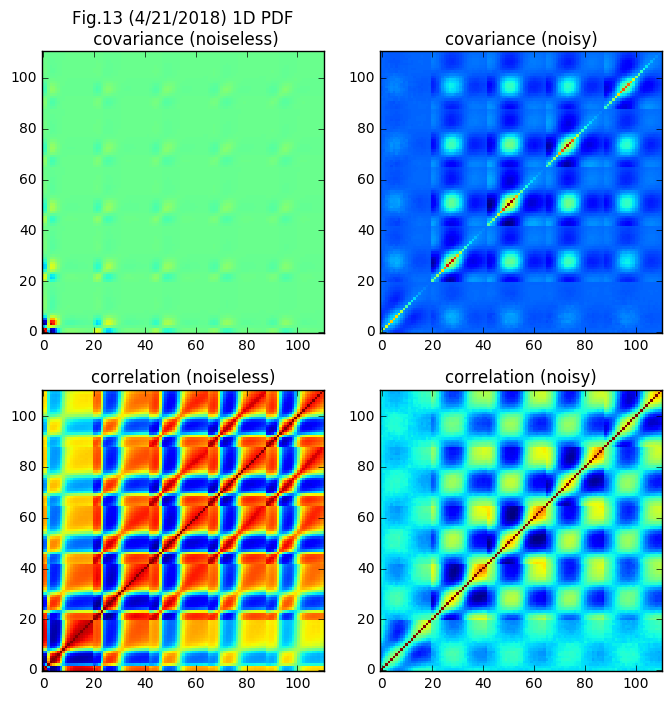

In [118]:
f, ((ax1, ax2),(ax1b, ax2b)) = subplots(2,2,figsize=(8,8))
ax1.imshow(cov1dI,interpolation='nearest',origin='lower')
ax2.imshow(cov1dN,interpolation='nearest',origin='lower')
ax1b.imshow(WLanalysis.corr_mat(cov1dI),interpolation='nearest',origin='lower')
ax2b.imshow(WLanalysis.corr_mat(cov1dN),interpolation='nearest',origin='lower')

ax1.set_title('Fig.13 (4/21/2018) 1D PDF\n covariance (noiseless)')
ax2.set_title('covariance (noisy)')
ax1b.set_title('correlation (noiseless)')
ax2b.set_title('correlation (noisy)')
show()

In [124]:
Fisher1dI = Fisher(cov1dII, der1dI)
Fisher1dN = Fisher(cov1dIN, der1dN)

In [126]:
print '1D PDF:'
print 'Fisher error (noiseless) on [Mnu, omega_m, A_s]:',Fisher1dI[1]*sqrt(12.25/2e4)
print 'Fisher error (EB recon)  on [Mnu, omega_m, A_s]:',Fisher1dN[1]*sqrt(12.25/2e4)

print '2D PDF:'
print 'Fisher error (noiseless) on [Mnu, omega_m, A_s]:',FisherI[1]*sqrt(12.25/2e4)
print 'Fisher error (EB recon)  on [Mnu, omega_m, A_s]:',FisherN[1]*sqrt(12.25/2e4)

1D PDF:
Fisher error (noiseless) on [Mnu, omega_m, A_s]: [ 0.00039957  0.00114438  0.00301747]
Fisher error (EB recon)  on [Mnu, omega_m, A_s]: [ 0.00152983  0.00468456  0.00413899]
2D PDF:
Fisher error (noiseless) on [Mnu, omega_m, A_s]: [ 0.00028652  0.00085273  0.00097612]
Fisher error (EB recon)  on [Mnu, omega_m, A_s]: [ 0.00090727  0.00273976  0.00088133]
